## Classification using Linear regression model
### Theory:
A line can be represented as 
w1x1 + w2x2 + b = 0
where w1, w2 are weights which dictate a slope and b is the bias
* These weights start out as random values. So, we are just going to have a random line which does not classify our data correctly.
* But as the neural network learns more about what kind of output data its dealing with it will adjust the weights based on the output errors that resulted in categorizing the data with previous weights, until it comes up with a better model.So, how do we do this?
* We use Sigmoid function to predict continuos probabilities for each point.
* Using these probabilities we calculate the error with Cross Entropy [It is an error function used to calculate the total error associated with our linear model, the more incorrect our model in separating our data more the entropy value, thus larger the error]
* We use gradient descent, which keeps minimizing the error, doing so obtaining the linear model.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def draw(x1, x2):
    ln = plt.plot(x1,x2)
    
def sigmoid(score):
    return 1/(1 + np.exp(-score))

def calculate_error(line_parameters, points, y):
    m = points.shape[0]
    p = sigmoid(points*line_parameters) # probabilities of each point being in the positive region
    cross_entropy = -(1/m)*(np.log(p).T * y + np.log(1-p).T*(1-y))
    return cross_entropy

def gradient_descent(line_parameters, points, y , alpha):
    m = points.shape[0]
    for i in range(500):
        p = p = sigmoid(points*line_parameters)
        gradient = (points.T * (p - y))*(alpha/m)
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        x1 = np.array([bottom_region[:, 0].min(),top_region[:, 0].max()]) 
        x2 = -b/w2+x1*(-w1/w2) # derived from w1x1 + w2x2 + b = 0 we get x2 = -b/w2 + x1 * (-w1/w2)
    draw(x1, x2)

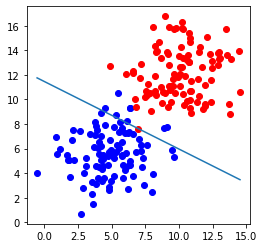

In [14]:
# Generating random horizontal and vertical coordinates
# we have 100 points at the bottom and top regions each one with x1 and x2 coordinates
# random_x1_values denotes how the points are distributed horizontally
# random_x2_values denotes how the points are distributed vertically

n_pts = 100 # no of points
bias = np.ones(n_pts)
np.random.seed(0) # generates same set of random numbers every time we run
random_x1_values = np.random.normal(10, 2, n_pts) # (mean = 10,standard deviation = 2) # normally distributed numbers
random_x2_values = np.random.normal(12, 2, n_pts) 
top_region = np.array([random_x1_values, random_x2_values, bias]).T # Transpose
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts), bias]).T
all_points = np.vstack((top_region, bottom_region)) # contains x1,x2 bias as array
line_parameters = np.matrix(np.matrix([np.zeros(3)])).T
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)

_ ,ax = plt.subplots(figsize=(4, 4))
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')
gradient_descent(line_parameters, all_points, y, 0.06) # alpha 0.06 also called learning value
plt.show()